In [1]:
%matplotlib inline

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from helpers import interp2
import math

class face_warp:
    def __init__(self, src_file):
        source_file = src_file
        im_src = np.array(Image.open(source_file).convert('RGB'))
        self.img_H, self.img_W = im_src.shape[0], im_src.shape[1]
        # print(self.img_H, self.img_W)
        # pad_width = int(np.max([self.img_H, self.img_W])/2)
        # pad_width = int(np.max([self.img_H, self.img_W]))
        pad_width_top = 200
        pad_width_left = 200
        pad_width_bottom = 200
        pad_width_right = 200

        # print(pad_width)
        self.im_src = np.pad(im_src, ((pad_width_top, pad_width_bottom), (pad_width_left, pad_width_right), (0, 0)), mode = 'constant')
    
    def trans_2D(self, trans_mat_2D):
        trans_mat = np.zeros((3,3))
        trans_mat[2,2] = 1
        trans_mat[:2, :2] = trans_mat_2D
        return trans_mat
    
 
    def face_warp(self, img, trans_mat):
        H, W, _ = img.shape
        generated_pic = np.zeros((H, W, 3), dtype=np.uint8)
        xx, yy = np.meshgrid(np.arange(W), np.arange(H))
        # coor set
        coor = np.zeros((3, H*W))
        coor[0, :] = xx.flatten()
        coor[1, :] = yy.flatten()
        coor[2, :] = 1
        # inv trans_mat and trans back into the original
        inv_trans = np.linalg.pinv(trans_mat)
        map_back_coor = inv_trans @ coor
        generated_pic[:, :, 0] = np.reshape(interp2(img[:, :, 0], map_back_coor[0, :], map_back_coor[1, :]),
                                            [H, W])
        generated_pic[:, :, 1] = np.reshape(interp2(img[:, :, 1], map_back_coor[0, :], map_back_coor[1, :]),
                                            [H, W])
        generated_pic[:, :, 2] = np.reshape(interp2(img[:, :, 2], map_back_coor[0, :], map_back_coor[1, :]),
                                            [H, W])

#         print(type(generated_pic[0, 0, 0]))
#         print(type(img[0, 0, 0]))
        return generated_pic

    

Original image


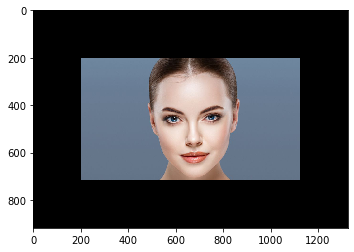

Warped image


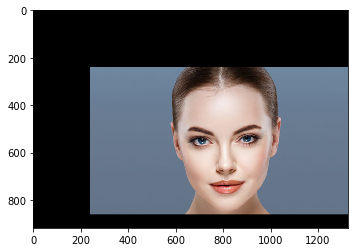

In [3]:
if __name__ == '__main__':
    warp = face_warp('source.jpg')
    # warp.im_src
    print("Original image")
    plt.imshow(warp.im_src)
    plt.show()

    # costom_trans
    ## TODO: fill in a 2-by-2 matrix
    trans_mat_2D = np.array([[1.2,0],
                             [0.,1.2]])
    
    trans_mat = warp.trans_2D(trans_mat_2D)
    warped_face = warp.face_warp(warp.im_src, trans_mat)
    print("Warped image")
    plt.imshow(warped_face)
    plt.show()

    

# Tips:

In [4]:
q = math.pi/3
np.array([[math.cos(q),-math.sin(q)],
          [math.sin(q), math.cos(q)]])

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])